Here we load both the hardvard-oxford jointed cortical and subcortical parcellation labels, its derived skeleton and graph, and run the community algorithm on them.


In [10]:
import networkx as nx
import numpy as np
from nilearn import datasets, plotting
import nibabel as nib
import matplotlib.pyplot as plt
import os

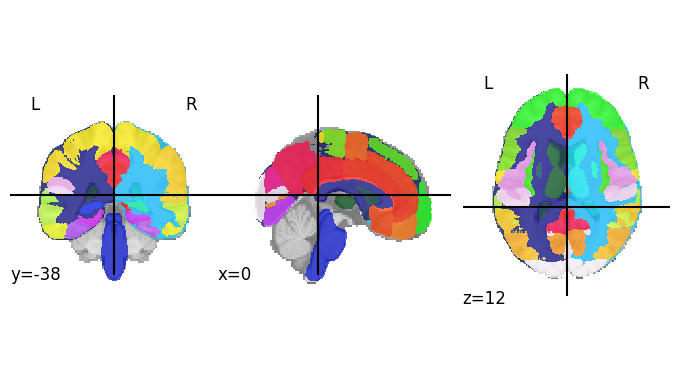

In [4]:
path_img = 'PR-graphomics/harvard_oxford_combined.nii.gz'

img = nib.load(path_img)

plotting.plot_roi(img)

/home/daniele/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:758: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



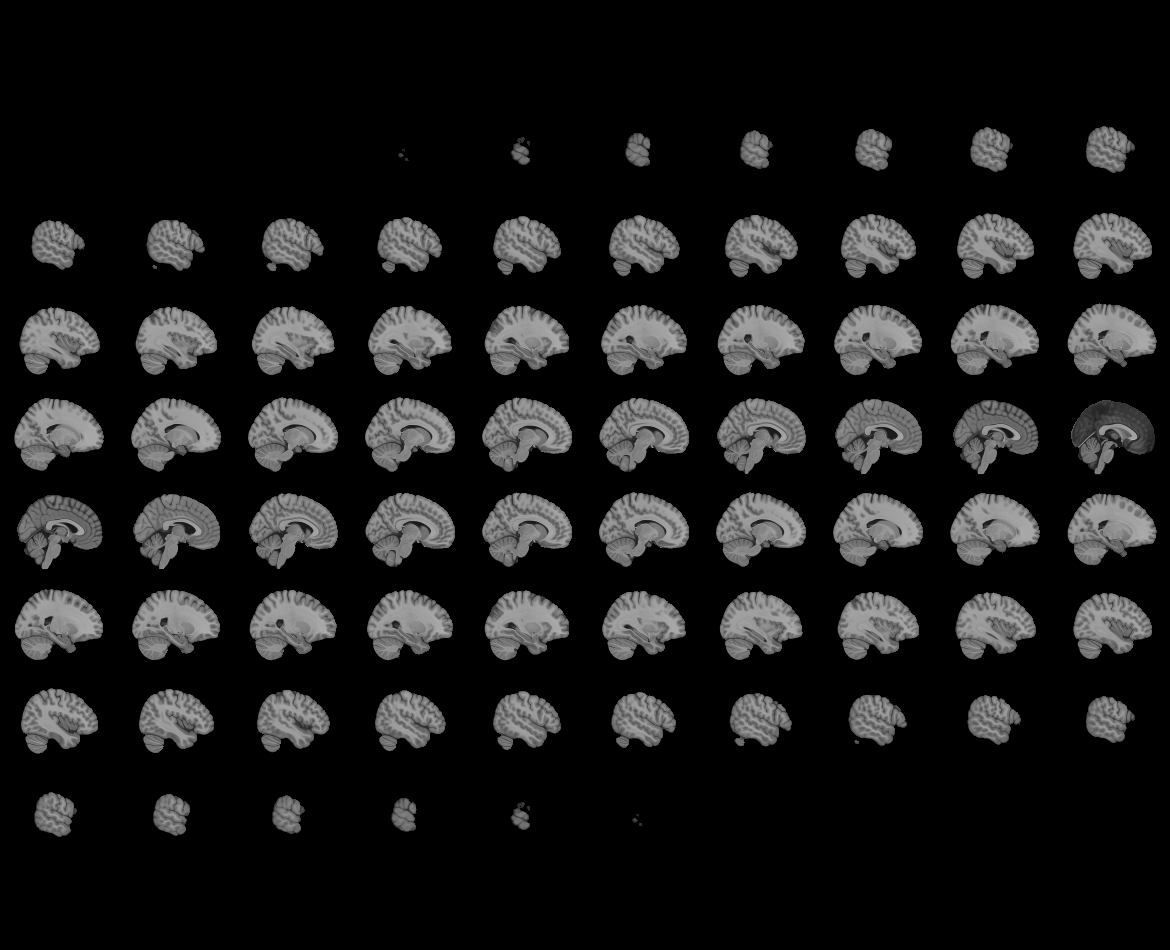
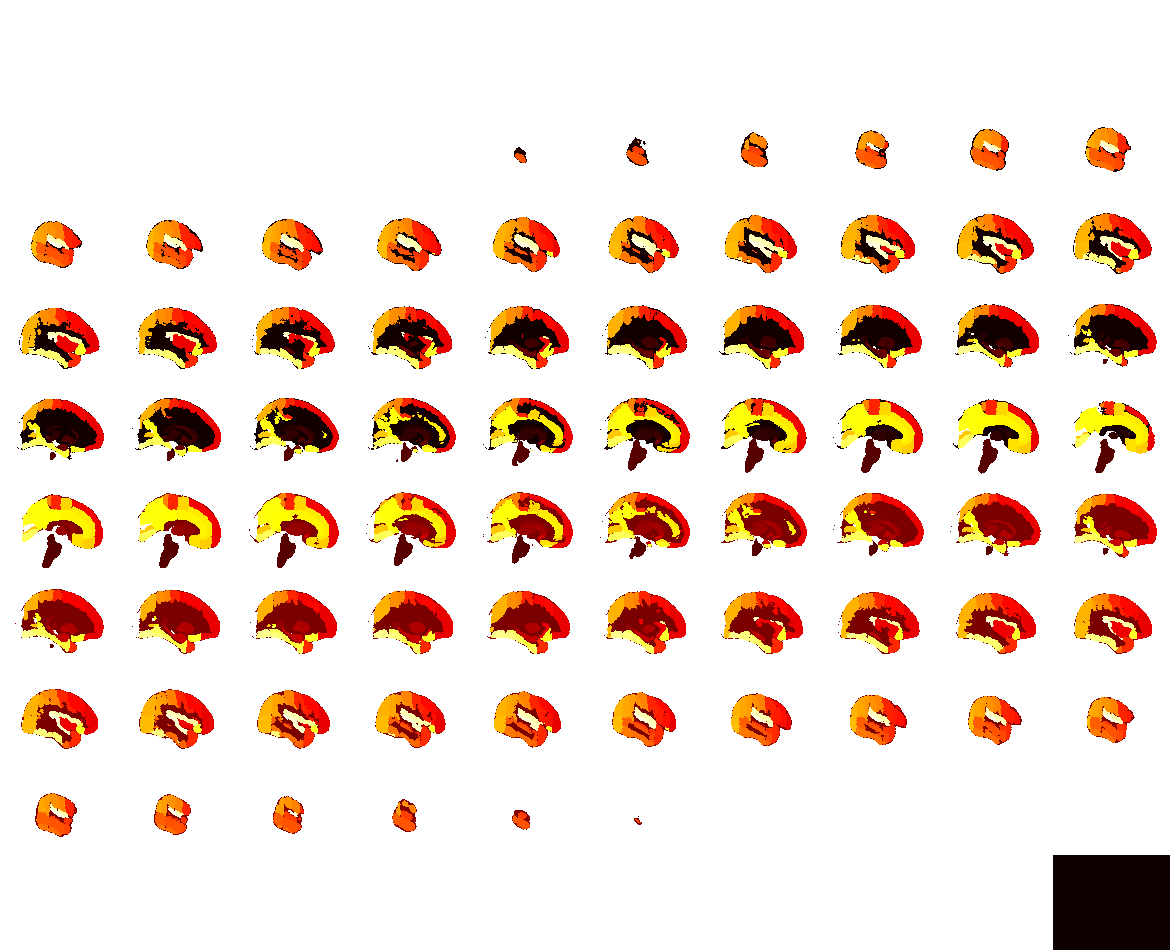

In [5]:

# Visualize the new view
view = plotting.view_img(img, threshold=0.01, colorbar=True, title="Harvard-Oxford Combined")
view

In [8]:
graph = nx.read_gpickle('PR-graphomics/sk-graph_atlas_bin.pickle')

print(graph.nodes())



[(81.0, 55.0, 37.0), (71.0, 22.0, 63.0), (85.0, 83.0, 28.0), (51.0, 82.0, 83.0), (89.0, 59.0, 39.0), (93.0, 77.0, 37.0), (96.0, 60.0, 101.0), (112.0, 91.0, 51.0), (95.0, 65.0, 104.0), (47.0, 97.0, 84.0), (92.0, 97.0, 41.0), (107.0, 116.0, 66.0), (102.0, 123.0, 79.0), (58.0, 76.0, 68.0), (51.0, 96.0, 98.0), (99.0, 91.0, 102.0), (91.0, 102.0, 42.0), (90.0, 84.0, 114.0), (42.0, 84.0, 79.0), (48.0, 93.0, 59.0), (101.0, 98.0, 46.0), (83.0, 91.0, 117.0), (103.0, 111.0, 50.0), (45.0, 95.0, 62.0), (87.0, 113.0, 45.0), (96.0, 82.0, 106.0), (102.0, 100.0, 99.0), (72.0, 111.0, 36.0), (59.0, 76.0, 90.0), (71.0, 78.0, 63.0), (95.0, 99.0, 43.0), (94.0, 82.0, 107.0), (103.0, 70.0, 99.0), (90.0, 89.0, 34.0), (93.0, 83.0, 38.0), (104.0, 86.0, 100.0), (59.0, 76.0, 76.0), (61.0, 77.0, 84.0), (76.0, 27.0, 92.0), (11.0, 66.0, 72.0), (99.0, 96.0, 45.0), (41.0, 81.0, 73.0), (95.0, 96.0, 42.0), (108.0, 111.0, 61.0), (85.0, 62.0, 31.0), (56.0, 80.0, 59.0), (77.0, 25.0, 56.0), (92.0, 71.0, 37.0), (110.0, 88.0, 

Something's wrong with the generation: let me try and print the old images with the new method

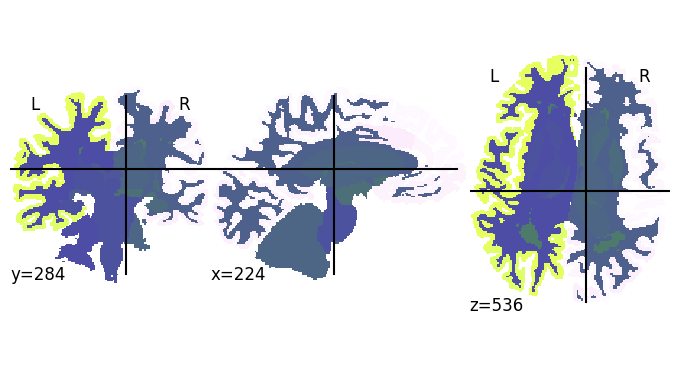

In [27]:

main_directory = "PR-graphomics/sequences/"

folders = [f for f in os.listdir(main_directory) if os.path.isdir(os.path.join(main_directory, f))]
folder = folders[60]   #select a specific patient to perform the analysis on

folder_path = os.path.join(main_directory, folder)
folder_path = os.path.join(folder_path, os.listdir(folder_path)[0])


image_path = os.path.join(folder_path, 'aparc.DKTatlas+aseg.deep.mgz')

img = nib.load(image_path)

plotting.plot_roi(img)


In [15]:

mgz_img = nib.load(image_path)
mgz_data = mgz_img.get_fdata()  # Extract the data as a NumPy array
affine = mgz_img.affine  # Get the affine transformation

# Get unique labels and relabel them with integers starting from 1
unique_labels = np.unique(mgz_data)  # Find all unique labels
unique_labels = unique_labels[unique_labels > 0]  # Ignore background (label 0)

# Create a mapping from old labels to new labels
label_mapping = {old_label: new_label for new_label, old_label in enumerate(unique_labels, start=1)}

# Map the labels to the new integers
normalized_data = np.zeros_like(mgz_data, dtype=np.int32)
for old_label, new_label in label_mapping.items():
    normalized_data[mgz_data == old_label] = new_label

# Save the normalized data to a NIfTI file
nifti_img = nib.Nifti1Image(normalized_data, affine=affine)



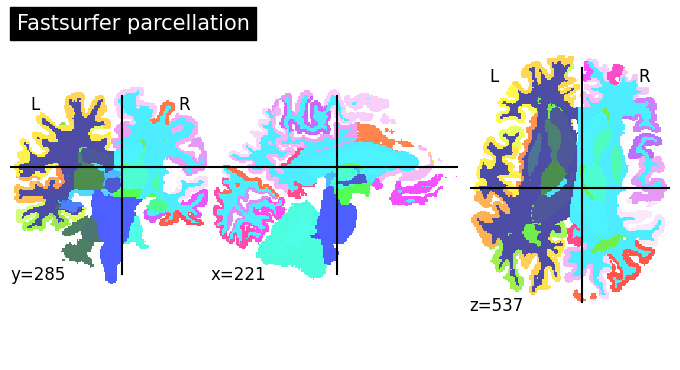

In [33]:

plotting.plot_roi(nifti_img, title="Fastsurfer parcellation")


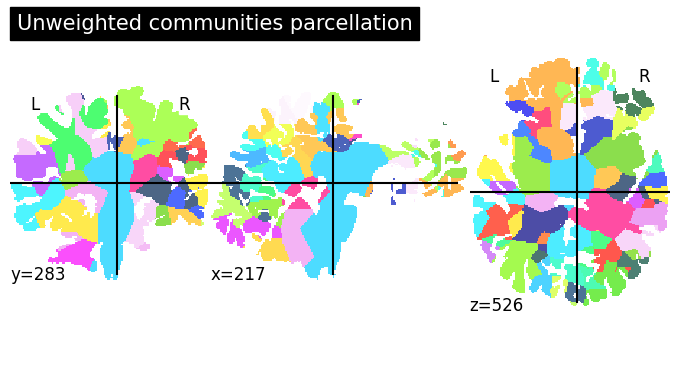

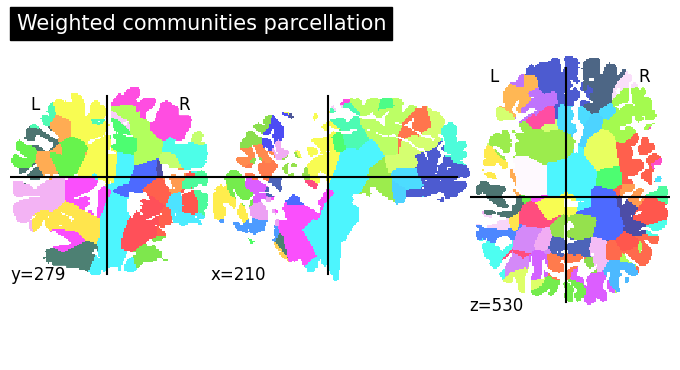

In [32]:
community_map = np.load('PR-graphomics/unweighted_labels.npy')
w_community_map = np.load('PR-graphomics/weighted_labels.npy')

community_map = community_map.astype(float)
w_community_map = w_community_map.astype(float)

plotting.plot_roi(nib.Nifti1Image(community_map, affine=affine), title="Unweighted communities parcellation")
plotting.plot_roi(nib.Nifti1Image(w_community_map, affine=affine), title="Weighted communities parcellation")
